In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from pylab import *

In [2]:
df = pd.read_csv(r"C:\Users\darshini\OneDrive\Desktop\xyz\miningprocess_flotation_plant_dataset.csv",decimal=',',parse_dates=["date"],infer_datetime_format=True).drop_duplicates()

C:\Users\darshini\AppData\Local\Temp\ipykernel_6348\3810710984.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(r"C:\Users\darshini\OneDrive\Desktop\xyz\miningprocess_flotation_plant_dataset.csv",decimal=',',parse_dates=["date"],infer_datetime_format=True).drop_duplicates()


In [3]:
df.shape

(736282, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736282 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   date                      736282 non-null  object 
 1   % Iron Feed               736282 non-null  float64
 2   % Silica Feed             736282 non-null  float64
 3   StarchFlow                736282 non-null  float64
 4   AminaFlow                 736282 non-null  float64
 5   OrePulpFlow               736282 non-null  float64
 6   OrePulppH                 736282 non-null  float64
 7   OrePulpDensity            736282 non-null  float64
 8   FlotationColumn01AirFlow  736282 non-null  float64
 9   FlotationColumn02AirFlow  736282 non-null  float64
 10  FlotationColumn03AirFlow  736282 non-null  float64
 11  FlotationColumn04AirFlow  736282 non-null  float64
 12  FlotationColumn05AirFlow  736282 non-null  float64
 13  FlotationColumn06AirFlow  736282 non-null  float6

In [5]:
df.head(10)

,date,% Iron Feed,% Silica Feed,StarchFlow,AminaFlow,OrePulpFlow,OrePulppH,OrePulpDensity,FlotationColumn01AirFlow,FlotationColumn02AirFlow,...,FlotationColumn07AirFlow,FlotationColumn01Level,FlotationColumn02Level,FlotationColumn03Level,FlotationColumn04Level,FlotationColumn05Level,FlotationColumn06Level,FlotationColumn07Level,%IronConcentrate,%SilicaConcentrate
0,10-03-2017 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,10-03-2017 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,10-03-2017 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,10-03-2017 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,10-03-2017 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
5,10-03-2017 01:00:00,55.2,16.98,3079.10,564.697,396.533,10.0705,1.74,250.730,248.906,...,251.873,444.384,443.269,460.449,439.920,451.588,433.539,425.458,66.91,1.31
6,10-03-2017 01:00:00,55.2,16.98,3127.79,566.467,392.900,10.0713,1.74,250.313,252.202,...,253.477,446.185,444.571,452.306,431.328,443.548,444.575,431.251,66.91,1.31
7,10-03-2017 01:00:00,55.2,16.98,3152.93,558.777,397.002,10.0722,1.74,249.895,253.630,...,253.345,445.985,461.341,461.640,442.067,441.730,461.770,449.679,66.91,1.31
8,10-03-2017 01:00:00,55.2,16.98,3147.27,556.030,394.307,10.0730,1.74,250.137,251.104,...,250.884,446.686,478.385,459.103,455.074,439.798,457.738,455.915,66.91,1.31
9,10-03-2017 01:00:00,55.2,16.98,3142.58,565.857,393.105,10.0738,1.74,249.653,252.202,...,248.137,445.685,478.779,460.665,457.225,453.236,449.898,455.750,66.91,1.31


In [6]:
df['date'] = pd.to_datetime(df['date'], format= "%d-%m-%Y %H:%M:%S")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736282 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   date                      736282 non-null  datetime64[ns]
 1   % Iron Feed               736282 non-null  float64       
 2   % Silica Feed             736282 non-null  float64       
 3   StarchFlow                736282 non-null  float64       
 4   AminaFlow                 736282 non-null  float64       
 5   OrePulpFlow               736282 non-null  float64       
 6   OrePulppH                 736282 non-null  float64       
 7   OrePulpDensity            736282 non-null  float64       
 8   FlotationColumn01AirFlow  736282 non-null  float64       
 9   FlotationColumn02AirFlow  736282 non-null  float64       
 10  FlotationColumn03AirFlow  736282 non-null  float64       
 11  FlotationColumn04AirFlow  736282 non-null  float64       
 12  Flotati

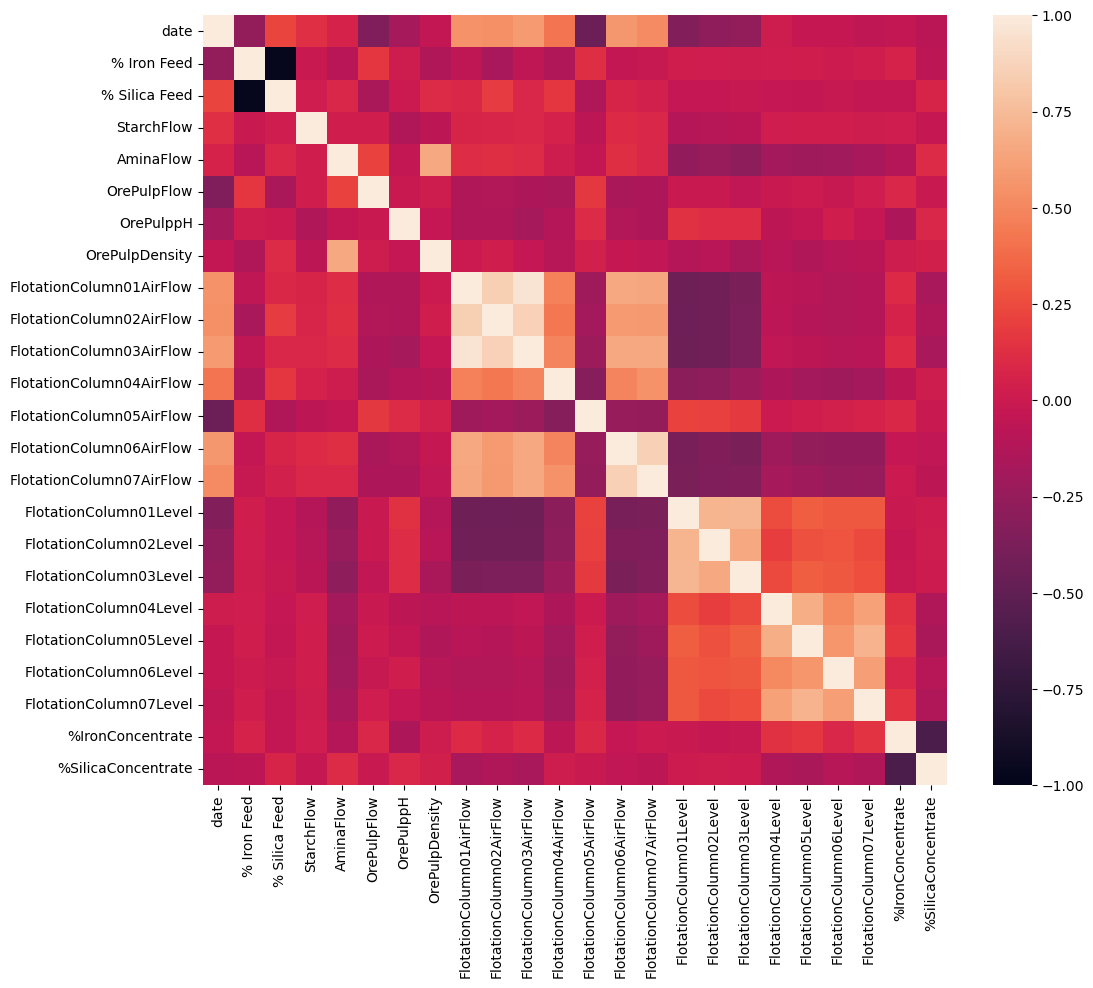

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), vmin=-1.0, vmax=1.0)
plt.show()

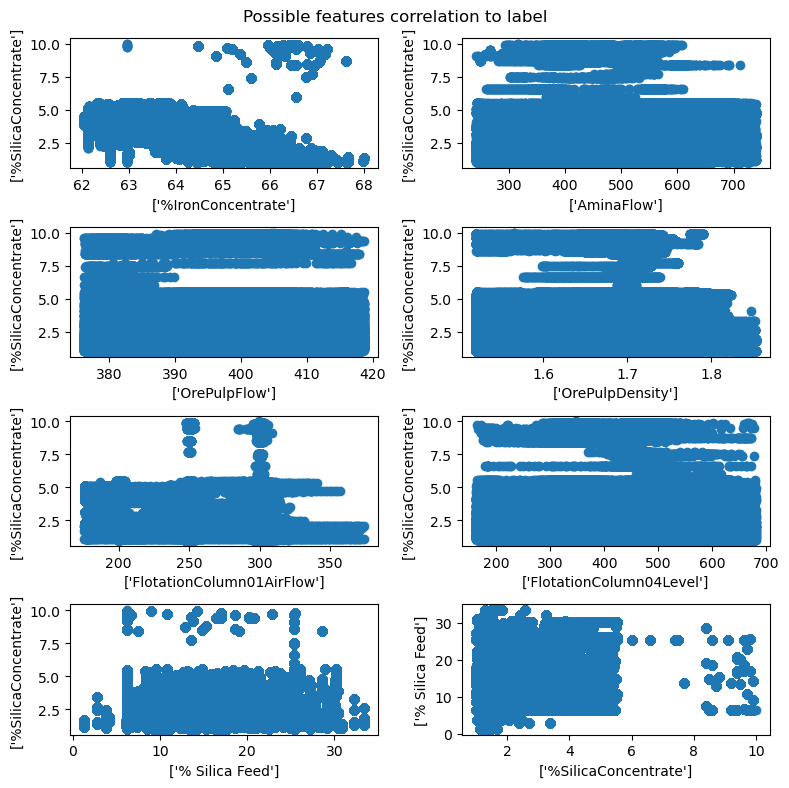

In [9]:
fig, axs =plt.subplots(4,2,figsize=(8, 8))
fig.suptitle('Possible features correlation to label')


axs[0,0].scatter(df['%IronConcentrate'],df['%SilicaConcentrate'])
axs[0,0].set_xlabel(['%IronConcentrate'])
axs[0,0].set_ylabel(['%SilicaConcentrate'])

axs[0,1].scatter(df['AminaFlow'],df['%SilicaConcentrate'])
axs[0,1].set_xlabel(['AminaFlow'])
axs[0,1].set_ylabel(['%SilicaConcentrate'])

axs[1,0].scatter(df['OrePulpFlow'],df['%SilicaConcentrate'])
axs[1,0].set_xlabel(['OrePulpFlow'])
axs[1,0].set_ylabel(['%SilicaConcentrate'])

axs[1,1].scatter(df['OrePulpDensity'],df['%SilicaConcentrate'])
axs[1,1].set_xlabel(['OrePulpDensity'])
axs[1,1].set_ylabel(['%SilicaConcentrate'])

axs[2,0].scatter(df['FlotationColumn01AirFlow'],df['%SilicaConcentrate'])
axs[2,0].set_xlabel(['FlotationColumn01AirFlow'])
axs[2,0].set_ylabel(['%SilicaConcentrate'])

axs[2,1].scatter(df[ 'FlotationColumn04Level'],df['%SilicaConcentrate'])
axs[2,1].set_xlabel([ 'FlotationColumn04Level'])
axs[2,1].set_ylabel(['%SilicaConcentrate'])


axs[3,0].scatter(df['% Silica Feed'],df['%SilicaConcentrate'])
axs[3,0].set_xlabel(['% Silica Feed'])
axs[3,0].set_ylabel(['%SilicaConcentrate'])

axs[3,1].scatter(df['%SilicaConcentrate'],df['% Silica Feed'])
axs[3,1].set_xlabel(['%SilicaConcentrate'])
axs[3,1].set_ylabel(['% Silica Feed'])


plt.tight_layout()

In [10]:
droplist=['% Iron Feed','StarchFlow',\
          'OrePulppH','FlotationColumn02AirFlow',\
          'FlotationColumn03AirFlow', 'FlotationColumn04AirFlow',\
          'FlotationColumn05AirFlow', 'FlotationColumn06AirFlow',\
          'FlotationColumn07AirFlow', 'FlotationColumn01Level',
          'FlotationColumn02Level', 'FlotationColumn03Level', 'FlotationColumn05Level',
          'FlotationColumn06Level', 'FlotationColumn07Level',]

df=df.drop(droplist,axis=1)
df.shape


(736282, 9)

In [11]:
df['%IronConcentrate_power2']=df['%IronConcentrate']**2

df

,date,% Silica Feed,AminaFlow,OrePulpFlow,OrePulpDensity,FlotationColumn01AirFlow,FlotationColumn04Level,%IronConcentrate,%SilicaConcentrate,%IronConcentrate_power2
0,2017-03-10 01:00:00,16.98,557.434,395.713,1.74000,249.214,443.558,66.91,1.31,4476.9481
1,2017-03-10 01:00:00,16.98,563.965,397.383,1.74000,249.719,448.086,66.91,1.31,4476.9481
2,2017-03-10 01:00:00,16.98,568.054,399.668,1.74000,249.741,449.688,66.91,1.31,4476.9481
3,2017-03-10 01:00:00,16.98,568.665,397.939,1.74000,249.917,446.210,66.91,1.31,4476.9481
4,2017-03-10 01:00:00,16.98,558.167,400.254,1.74000,250.203,453.670,66.91,1.31,4476.9481
...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,23.20,441.052,386.570,1.65365,302.344,418.725,64.27,1.71,4130.6329
737449,2017-09-09 23:00:00,23.20,473.436,384.939,1.65352,303.013,418.377,64.27,1.71,4130.6329
737450,2017-09-09 23:00:00,23.20,500.488,383.496,1.65338,303.662,419.531,64.27,1.71,4130.6329
737451,2017-09-09 23:00:00,23.20,491.548,384.976,1.65324,302.550,407.299,64.27,1.71,4130.6329


In [12]:
df.groupby(['%SilicaConcentrate']).mean()

,date,% Silica Feed,AminaFlow,OrePulpFlow,OrePulpDensity,FlotationColumn01AirFlow,FlotationColumn04Level,%IronConcentrate,%IronConcentrate_power2
%SilicaConcentrate,,,,,,,,,
1.000000,2017-06-07 19:24:00,14.034,475.201123,397.433940,1.697529,283.401554,453.606616,66.362000,4404.323873
1.003591,2017-06-07 21:00:00,6.260,317.510382,404.233778,1.564881,299.417000,351.075000,62.970000,3965.220900
1.007790,2017-06-07 21:00:00,6.260,317.901809,403.859500,1.565068,299.314000,354.107000,62.970000,3965.220900
1.010000,2017-05-12 06:48:00,10.754,406.479240,400.924131,1.618408,278.284391,429.052350,66.419333,4411.692767
1.011989,2017-06-07 21:00:00,6.260,318.293236,403.485222,1.565256,299.535000,352.263000,62.970000,3965.220900
...,...,...,...,...,...,...,...,...,...
9.867956,2017-06-07 21:00:00,6.260,315.944674,405.730889,1.564130,300.170000,363.747000,62.970000,3965.220900
9.900000,2017-05-25 07:24:00,8.406,446.796032,400.170666,1.681936,269.973536,397.585177,66.356000,4403.167160
9.909945,2017-06-07 21:00:00,6.260,316.336101,405.356611,1.564318,299.847000,346.987000,62.970000,3965.220900


In [13]:
df.groupby(['%IronConcentrate']).mean()

,date,% Silica Feed,AminaFlow,OrePulpFlow,OrePulpDensity,FlotationColumn01AirFlow,FlotationColumn04Level,%SilicaConcentrate,%IronConcentrate_power2
%IronConcentrate,,,,,,,,,
62.050000,2017-04-18 12:30:00,13.35,542.608150,400.167157,1.766480,275.036800,374.896306,4.100062,3850.202500
62.052219,2017-05-03 12:00:00,9.29,559.878000,396.816000,1.771370,300.484000,271.643000,3.892902,3850.477900
62.053684,2017-04-03 13:00:00,17.41,576.782000,404.297000,1.783270,250.269000,430.078000,4.532482,3850.659724
62.054438,2017-05-03 12:00:00,9.29,563.970000,397.320000,1.770600,300.526000,239.322000,3.892982,3850.753310
62.055014,2017-05-03 10:00:00,9.29,580.116000,399.114000,1.783490,299.487000,386.357000,3.878549,3850.824744
...,...,...,...,...,...,...,...,...,...
67.630000,2017-06-14 19:00:00,6.26,450.924417,400.162194,1.594675,299.930939,497.519506,1.050000,4573.816900
67.660000,2017-07-13 04:00:00,24.90,377.148094,400.064061,1.658189,249.998239,500.624361,1.410000,4577.875600
67.670000,2017-08-12 03:00:00,25.31,404.219844,380.739842,1.704377,299.911356,353.228433,1.030000,4579.228900


In [14]:
df=df.drop(['date'],axis=1)

y = df['%SilicaConcentrate']
X = df.drop(['%SilicaConcentrate'], axis=1)



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_i_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_i_scaled,
                                                    y,
                                                    test_size=0.3,
                                                   random_state=30)